In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numericalIntegration import plot_numerical_integration, simpsf
from scipy.integrate import simpson, cumulative_simpson

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 4.2 Método de Simpson

### 4.2.1 Explicación


Partiendo de la estrategia general para evaluar numéricamente una integral, expresandola como una suma discreta que aproxima el valor numérico de la misma:

$$ I = \int_{a}^{b} f(x) dx \approx \sum_{i=1}^{n} w_i f(x_i) + r_n$$

De forma general el método de Simpson consiste en aproximar $f(x)$ mediante un polinomio superior a grado uno. Por ejemplo, un polinomio de grado dos se puede construir mediante un polinomio de Lagrange:

$$f_2(x) = \frac{(x - x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} f(x_0) + \frac{(x - x_0)(x-x_2)}{(x_1 - x_0)(x_1-x_2)} f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} f(x_2)$$

Notese que para aproximar la función ahora se requiere de tres puntos, $x_0, x_1, x_2$.


En el **Método de Simpson 1/3**, la integral de $f(x)$ se aproxima mediante la integral de un polinomio de grado dos:

$$I = \int_{a}^{b} f(x) dx \approx \int_{a}^{b} f_2(x) dx$$


Cuando se tienen $2$ segmentos equiespaciados, delimitados por $3$ puntos equiespaciados ($a, \frac{a+b}{2}, b$), el tamaño de cada segmento es:

$$h = \frac{b-a}{2}$$

La formula general para integración de Simpson 1/3 en el intervalo $[a,b]$, se escribe entonces:

$$I \approx \frac{h}{3} \left[f(a) + 4f\left(\frac{a+b}{2}\right) + f(b)\right]$$

que también se puede escribir como:

$$I = \int_{a}^{b} f(x) dx \approx 2h \,\,\frac{f(a) + 4 f(\frac{a+b}{2}) + f(b)}{6}$$


$$I = \int_{a}^{b} f(x) dx \approx \underbrace{(b-a)}_{\mathrm{base}} \,\,\underbrace{\frac{f(a) + 4 f(\frac{a+b}{2}) + f(b)}{6} }_{\mathrm{promedio\,de\,alturas}}$$

**Mejorando la precisión**

Para mejorar la precisión del método del Simpson, el intervalo $[a, b]$ se puede dividir en múltiples segmentos, a los cuáles se les aplica la regla de Simpson de manera individual.

Cuando se tienen $n$ segmentos equiespaciados, delimitados por $n+1$ puntos equiespaciados ($x_0, x_1, x_2, \cdots, x_n$), el tamaño de cada segmento es:

$$h = \frac{b-a}{n}$$

Sustituyendo la regla del trapecio para todos los segmentos individuales se obtiene:

$$I = \int_{a}^{b} f(x) dx \approx 2h \frac{f(x_0) + 4 f(x_1) + f(x_2)}{6} + 2h \frac{f(x_2) + 4 f(x_3) + f(x_4)}{6} + \cdots + 2h \frac{f(x_{n-2}) + 4 f(x_{n-1}) + f(x_{n})}{6}$$

Agrupando términos se obtiene:

$$I \approx 2h \frac{ f(x_0) + \sum_{i=1,3,5}^{n-1} f(x_i) + 2 \sum_{j=2,4,6}^{n-2} f(x_j) + f(x_n)}{6}$$

que también se puede escribir como:

$$I \approx \underbrace{(b-a)}_{\mathrm{base}} \,\, \underbrace{\frac{f(x_0) + \sum_{i=1,3,5}^{n-1} f(x_i) + 2 \sum_{j=2,4,6}^{n-2} f(x_j) + f(x_n)}{3n}}_{\mathrm{promedio\,de\,alturas}}$$



En los bloques de código debajo se muestra el proceso de integración por el método del trapecio para una función conocida `f`, entre los límites del intervalo de integración `a`, `b`, para un número dado de intervalos `N`.

In [2]:
f = lambda x: 3+ x + x**2 + x**3 + x**4
a = -1 # límite inferior
b = 1 # límite superior
N = [1, 2, 10, 20] # lista con número de intervalos

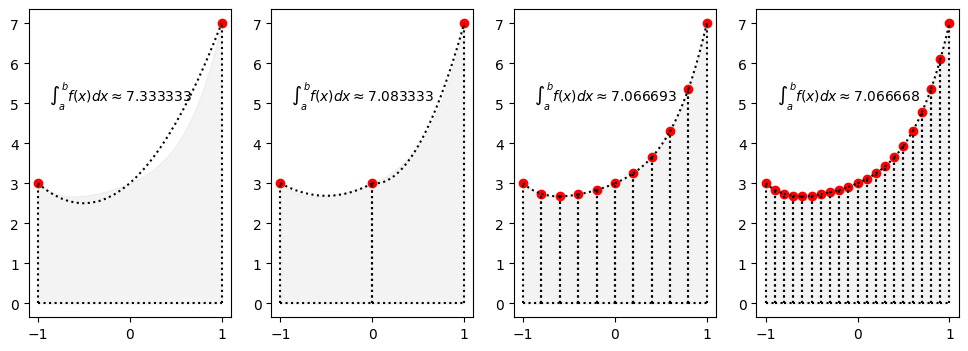

In [3]:
# Esquema gráfico para diferentes números de intervalos
fig, axes = plt.subplots(ncols=len(N), figsize=(12, 4))
for i, n in enumerate(N):
    plot_numerical_integration(f, a, b, N=n, method='simpson', ax=axes[i])
plt.show()

### 4.1.2 Ejemplos

#### 4.1.2.1 Integración de una función conocida

En estos casos, se conoce la forma de la función $f(x)$, para la cuál pueda o no estar definida la integral analítica.

In [4]:
def simpsf(f, A, B, N):
    xx = np.linspace(A, B, N+1)
    integral = 0
    for idx, x, in enumerate(xx[:-1]):
        a, b = xx[idx], xx[idx+1]
        mp = (a + b) / 2
        integral += (b - a) / 6 * (f(a) + 4*f(mp) + f(b))
    return integral

In [12]:
f = lambda x: np.exp(np.exp(x))
a = 0 # límite inferior
b = 1 # límite superior
N = [1, 2, 10, 20, 100] # lista con número de intervalos

# implementación propia de la función
for n in N:
    print(f"N = {n}, I ~ {simpsf(f, a, b, n)}")

N = 1, I ~ 6.445641188183025
N = 2, I ~ 6.328542481322286
N = 10, I ~ 6.3165868289292435
N = 20, I ~ 6.3165652853127625
N = 100, I ~ 6.31656384134661


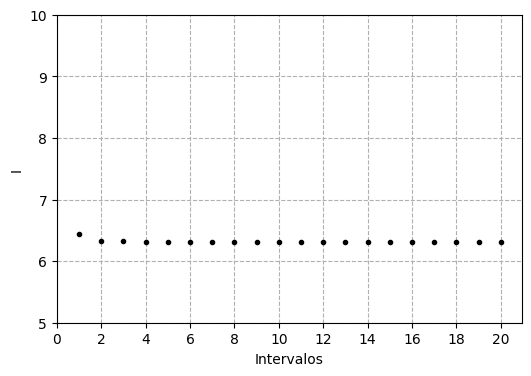

In [13]:
# convergencia del método al incrementar el número de intervalos
fig, ax = plt.subplots(figsize=(6, 4))
for n in range(1,21):
    ax.plot(n, simpsf(f, a, b, n), '.k')
ax.set(
    xlabel="Intervalos", 
    ylabel="I",
    xticks=range(0, 21, 2),
    ylim=(5, 10)
)
ax.grid(ls="--")
plt.show()

### 4.1.3 Integración de Simpson utilizando implementación en `scipy`

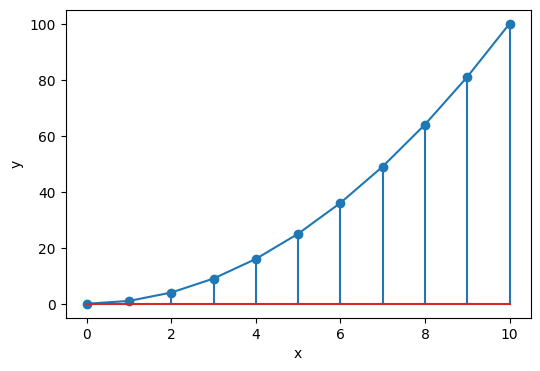

In [7]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100])

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y)
ax.stem(x, y)
ax.set(xlabel='x', ylabel='y')
plt.show()

La estimación de una integral por el método del trapecio se hace utilizando la función `simpson` de la librería `scipy`.

In [8]:
help(simpson)

Help on function simpson in module scipy.integrate._quadrature:

simpson(y, x=None, *, dx=1.0, axis=-1)
    Integrate y(x) using samples along the given axis and the composite
    Simpson's rule. If x is None, spacing of dx is assumed.
    
    Parameters
    ----------
    y : array_like
        Array to be integrated.
    x : array_like, optional
        If given, the points at which `y` is sampled.
    dx : float, optional
        Spacing of integration points along axis of `x`. Only used when
        `x` is None. Default is 1.
    axis : int, optional
        Axis along which to integrate. Default is the last axis.
    
    Returns
    -------
    float
        The estimated integral computed with the composite Simpson's rule.
    
    See Also
    --------
    quad : adaptive quadrature using QUADPACK
    fixed_quad : fixed-order Gaussian quadrature
    dblquad : double integrals
    tplquad : triple integrals
    romb : integrators for sampled data
    cumulative_trapezoid : cumu

In [9]:
integral = simpson(y, x=x)
print(f"I ~ {integral}")

I ~ 333.3333333333333


Cuando se desea conocer el valor acumulado de la integral al visitar cada segmento, se puede utilizar la función `cumulative_simpson()`.

In [10]:
help(cumulative_simpson)

Help on function cumulative_simpson in module scipy.integrate._quadrature:

cumulative_simpson(y, *, x=None, dx=1.0, axis=-1, initial=None)
    Cumulatively integrate y(x) using the composite Simpson's 1/3 rule.
    The integral of the samples at every point is calculated by assuming a 
    quadratic relationship between each point and the two adjacent points.
    
    Parameters
    ----------
    y : array_like
        Values to integrate. Requires at least one point along `axis`. If two or fewer
        points are provided along `axis`, Simpson's integration is not possible and the
        result is calculated with `cumulative_trapezoid`.
    x : array_like, optional
        The coordinate to integrate along. Must have the same shape as `y` or
        must be 1D with the same length as `y` along `axis`. `x` must also be
        strictly increasing along `axis`.
        If `x` is None (default), integration is performed using spacing `dx`
        between consecutive elements in `y`.


In [11]:
cumulative_integral = cumulative_simpson(y, x=x)
for i in range(len(cumulative_integral)):
    print(f"{i+1}, {cumulative_integral[i]}")

1, 0.3333333333333333
2, 2.6666666666666665
3, 9.0
4, 21.333333333333332
5, 41.666666666666664
6, 72.0
7, 114.33333333333333
8, 170.66666666666666
9, 243.0
10, 333.3333333333333
